# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "VAE"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'VAE',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.488  1  0.977 0.324 0.005   
                             age        0.155  1  0.311 0.578 0.002   
                             Kiel       2.038  1  4.079 0.045 0.021   
                             Magdeburg  4.130  1  8.267 0.004 0.041   
                             Sweden     7.112  1 14.235 0.000 0.069   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.017  1  0.017 0.896 0.000   
                             age        0.626  1  0.642 0.424 0.003   
                             Kiel       0.012  1  0.012 0.914 0.000   
                             Magdeburg  2.294  1  2.352 0.127 0.012   
                             Sweden    16.880  1 17.302 0.000 0.083   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.489  0.488    False  
                             age               0.238  0.714    False  
                             Kiel              1.349  0.113    False  
                             Magdeburg         2.347  0.017     True  
                             Sweden            3.667  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.048  0.939    False  
                             age               0.373  0.585    False  
                             Kiel              0.039  0.950    False  
                             Magdeburg         0.897  0.251    False  
                             Sweden            4.317  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                     VAE                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         1.071  1  7.817 0.006 0.039   
                             age        0.011  1  0.081 0.776 0.000   
                             Kiel       0.277  1  2.023 0.157 0.010   
                             Magdeburg  0.426  1  3.111 0.079 0.016   
                             Sweden     1.603  1 11.694 0.001 0.058   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         1.994  1  3.965 0.048 0.020   
                             age        0.473  1  0.940 0.333 0.005   
                             Kiel       2.466  1  4.902 0.028 0.025   
                             Magdeburg  2.084  1  4.144 0.043 0.021   
                             Sweden    17.155  1 34.107 0.000 0.152   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.244  0.016     True  
                             age               0.110  0.846    False  
                             Kiel              0.805  0.258    False  
                             Magdeburg         1.100  0.150    False  
                             Sweden            3.115  0.003     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.320  0.098    False  
                             age               0.477  0.466    False  
                             Kiel              1.553  0.063    False  
                             Magdeburg         1.365  0.090    False  
                             Sweden            7.656  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.324         0.489  0.488    False   
                             Kiel      0.045         1.349  0.113    False   
                             Magdeburg 0.004         2.347  0.017     True   
                             Sweden    0.000         3.667  0.001     True   
                             age       0.578         0.238  0.714    False   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.896         0.048  0.939    False   
                             Kiel      0.914         0.039  0.950    False   
                             Magdeburg 0.127         0.897  0.251    False   
                             Sweden    0.000         4.317  0.000     True   
                             age       0.424         0.373  0.585    False   

model                                    VAE                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.006         2.244  0.016     True  
                             Kiel      0.157         0.805  0.258    False  
                             Magdeburg 0.079         1.100  0.150    False  
                             Sweden    0.001         3.115  0.003     True  
                             age       0.776         0.110  0.846    False  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.048         1.320  0.098    False  
                             Kiel      0.028         1.553  0.063    False  
                             Magdeburg 0.043         1.365  0.090    False  
                             Sweden    0.000         7.656  0.000     True  
                             age       0.333         0.477  0.466    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'VAE': 'VAE'}

## Describe scores

In [10]:
scores.describe()

model        PI                               VAE                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.260         2.474     0.337     0.222         3.380     0.275
std       0.302         5.338     0.329     0.292         6.334     0.319
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.332     0.015     0.000         0.413     0.002
50%       0.122         0.913     0.244     0.058         1.239     0.115
75%       0.465         2.419     0.620     0.386         3.374     0.515
max       1.000       149.125     1.000     1.000        86.716     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

/tmp/ipykernel_49715/3761369923.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  scores.to_excel(writer, 'scores', **writer_args)


model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.324         0.489   
A0A024R0T9;K7ER74;P02655                           AD     0.044         1.354   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.153         0.814   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.490         0.310   
A0A075B6H7                                         AD     0.102         0.991   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.167         0.777   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.308         0.511   
S4R3U6                                             AD     0.896         0.048   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.488    False   
A0A024R0T9;K7ER74;P02655                           AD      0.112    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.288    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.642    False   
A0A075B6H7                                         AD      0.214    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.316    False   
Q9Y6X5                                             AD      0.304    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.182    False   
Q9Y6Y9                                             AD      0.472    False   
S4R3U6                                             AD      0.939    False   

model                                                       VAE                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.006         2.244   
A0A024R0T9;K7ER74;P02655                           AD     0.030         1.523   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.353         0.452   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.253         0.597   
A0A075B6H7                                         AD     0.003         2.493   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.146         0.835   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.754         0.123   
S4R3U6                                             AD     0.048         1.320   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.016     True  
A0A024R0T9;K7ER74;P02655                           AD      0.067    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.483    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.377    False  
A0A075B6H7                                         AD      0.010     True  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                               VAE                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.252         1.398     0.336     0.237         1.591     0.296
std       0.287         1.623     0.313     0.290         1.844     0.313
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.012         0.365     0.038     0.007         0.391     0.018
50%       0.123         0.909     0.246     0.087         1.059     0.161
75%       0.431         1.932     0.592     0.407         2.186     0.533
max       0.999        22.773     0.999     1.000        22.448     1.000

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,VAE
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1033,938


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.324         0.489  0.488   
A0A024R0T9;K7ER74;P02655                           0.044         1.354  0.112   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.153         0.814  0.288   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.490         0.310  0.642   
A0A075B6H7                                         0.102         0.991  0.214   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.316   
Q9Y6X5                                             0.167         0.777  0.304   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.182   
Q9Y6Y9                                             0.308         0.511  0.472   
S4R3U6                                             0.896         0.048  0.939   

                                                              VAE  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.006   
A0A024R0T9;K7ER74;P02655                              False 0.030   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.353   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.253   
A0A075B6H7                                            False 0.003   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.146   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.754   
S4R3U6                                                False 0.048   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               2.244  0.016   
A0A024R0T9;K7ER74;P02655                                   1.523  0.067   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.452  0.483   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.597  0.377   
A0A075B6H7                                                 2.493  0.010   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.282   
Q9Y6X5                                                     0.835  0.244   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.155   
Q9Y6Y9                                                     0.123  0.830   
S4R3U6                                                     1.320  0.098   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                           True       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                             True        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - VAE (no)    882
PI (yes) - VAE (yes)   332
PI (no)  - VAE (yes)   151
PI (yes) - VAE (no)     56
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

/tmp/ipykernel_49715/1417621106.py:6: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  _to_write.to_excel(writer, 'differences', **writer_args)


root - INFO     Writen to Excel file under sheet 'differences'.


PI                                 VAE  \
                             p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                           
A0A024QZX5;A0A087X1N8;P35237 0.324         0.489  0.488    False 0.006   
A0A075B6H7                   0.102         0.991  0.214    False 0.003   
A0A075B6H9                   0.340         0.468  0.504    False 0.019   
A0A075B6I0                   0.028         1.549  0.078    False 0.001   
A0A075B6J9                   0.026         1.587  0.073    False 0.018   
...                            ...           ...    ...      ...   ...   
Q9UKB5                       0.013         1.883  0.042     True 0.074   
Q9UNW1                       0.010         2.003  0.034     True 0.894   
Q9UP79                       0.241         0.617  0.397    False 0.000   
Q9UQ52                       0.019         1.716  0.058    False 0.001   
Q9Y6C2                       0.664         0.178  0.782    False 0.006   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A024QZX5;A0A087X1N8;P35237         2.244  0.016     True       186  
A0A075B6H7                           2.493  0.010     True        91  
A0A075B6H9                           1.715  0.046     True       189  
A0A075B6I0                           3.181  0.002     True       194  
A0A075B6J9                           1.746  0.044     True       156  
...                                    ...    ...      ...       ...  
Q9UKB5                               1.130  0.142    False       148  
Q9UNW1                               0.049  0.931    False       171  
Q9UP79                               4.823  0.000     True       135  
Q9UQ52                               3.198  0.002     True       188  
Q9Y6C2                               2.257  0.016     True       119  

[207 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,VAE,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.488,0.016,186,PI (no) - VAE (yes)
A0A024R0T9;K7ER74;P02655,0.112,0.067,195,PI (no) - VAE (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.288,0.483,174,PI (no) - VAE (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.642,0.377,196,PI (no) - VAE (no)
A0A075B6H7,0.214,0.010,91,PI (no) - VAE (yes)
...,...,...,...,...
Q9Y6R7,0.316,0.282,197,PI (no) - VAE (no)
Q9Y6X5,0.304,0.244,173,PI (no) - VAE (no)
Q9Y6Y8;Q9Y6Y8-2,0.182,0.155,197,PI (no) - VAE (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,VAE,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
P52758,0.002,0.978,119,PI (yes) - VAE (no),0.976
P48745,0.961,0.011,180,PI (no) - VAE (yes),0.949
A0A0C4DH31,0.949,0.009,52,PI (no) - VAE (yes),0.940
J3KSJ8;Q9UD71;Q9UD71-2,0.917,0.002,51,PI (no) - VAE (yes),0.915
D6RF35,0.934,0.023,57,PI (no) - VAE (yes),0.911
...,...,...,...,...,...
F5GY80;F5H7G1;P07358,0.057,0.046,197,PI (no) - VAE (yes),0.011
Q9NX62,0.056,0.045,197,PI (no) - VAE (yes),0.011
P00740;P00740-2,0.053,0.042,197,PI (no) - VAE (yes),0.010


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE/diff_analysis_comparision_1_VAE


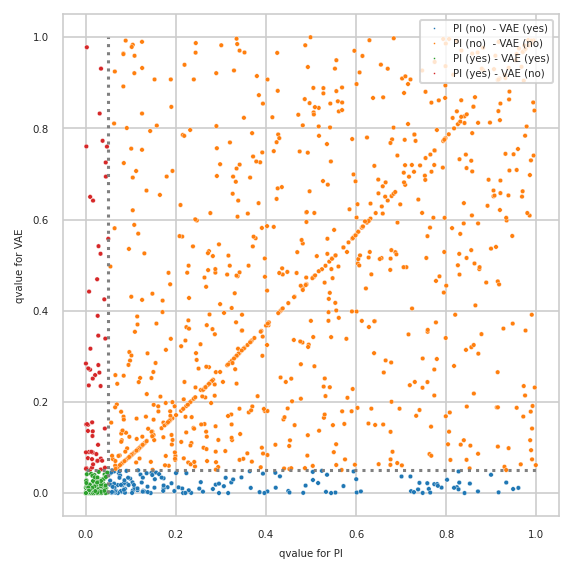

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE/diff_analysis_comparision_2_VAE


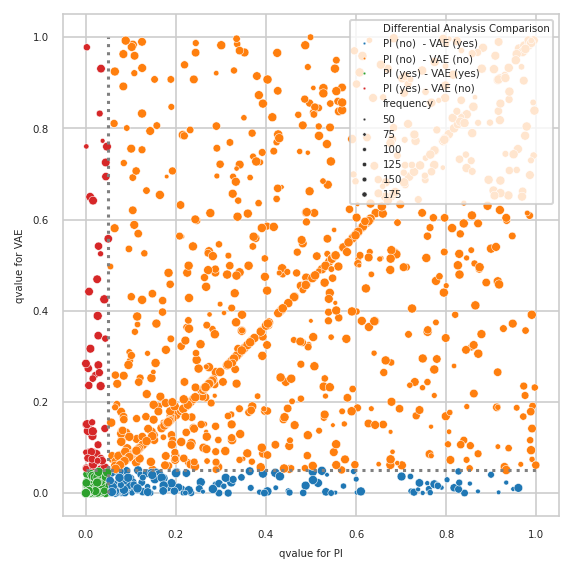

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

pimmslearn.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
PSEN2,ENSP00000355747,5.000
MAPT,ENSP00000340820,4.800
...,...,...
FRAT2,ENSP00000360058,0.681
CLEC4M,ENSP00000316228,0.681
DSC2,ENSP00000280904,0.681


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/home/runner/work/pimms/pimms/project/.snakemake/conda/3fa5fb1d5dd2a817778dc1597a6471cf_/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out